## Go, Johann and Uy, Beatrice 

##### This program uses the independent variable PT08.S4(NO2) to predict the absolute humidity AH of each trial. 

### 1. Import libraries and dataset

In [178]:
import numpy as np #  used for working with arrays
import pandas as pd # a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns # a Python data visualization library based on matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [179]:
# to import dataset from the same directory
df = pd.read_csv("AirQualityUCI.csv")

### 2. Preliminary dataset analysis

In [180]:
# to show the first five rows of the dataset
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [181]:
# to show the number of rows and columns of the dataset
df.shape

(9471, 17)

In [182]:
# to check column names and total records
df.count

<bound method DataFrame.count of             Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0   

In [183]:
# to determine the variables' data types
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [184]:
# to view more information about the dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

### 3. Handling missing, duplicates, outliers of the dataset

In [185]:
# to know if there is missing data
df.isnull().sum().sort_values(ascending=False)

Unnamed: 16      9471
Unnamed: 15      9471
NOx(GT)           114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Date              114
dtype: int64

In [186]:
# to determine if there are any duplicates
df.duplicated().sum()

113

In [187]:
# to view the duplicate records
duplicates = df.duplicated()

df[duplicates]

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9358  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9359  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9360  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9361  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9362  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
...   ...  ...     ...          ...       ...       ...            ...   
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  \
9358      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9359      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9360      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9361      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9362      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
...       ...           ...      ...           ...          ...  ..  ..  ..   
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   

      Unnamed: 15  Unnamed: 16  
9358          NaN          NaN  
9359          NaN          NaN  
9360          NaN          NaN  
9361          NaN          NaN  
9362          NaN          NaN  
...           ...          ...  
9466          NaN          NaN  
9467          NaN          NaN  
9468          NaN          NaN  
9469          NaN          NaN  
9470          NaN          NaN  

[113 rows x 17 columns]

In [188]:
# to delete duplicate rows
df.drop_duplicates(inplace=True)


In [189]:
#To replace -200 values into NaN
df = df[df.iloc[0:9357] != -200]

In [190]:
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9353  04/04/2005  11:00:00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12:00:00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13:00:00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14:00:00     2.2       1071.0       NaN      11.9   
9357         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   
9357            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13.6  48.9  0.7578          NaN          NaN  
1           972.0  13.3  47.7  0.7255          NaN          NaN  
2          1074.0  11.9  54.0  0.7502          NaN          NaN  
3          1203.0  11.0  60.0  0.7867          NaN          NaN  
4          1110.0  11.2  59.6  0.7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9353       1269.0  24.3  23.7  0.7119          NaN          NaN  
9354       1092.0  26.9  18.3  0.6406          NaN          NaN  
9355        770.0  28.3  13.5  0.5139          NaN          NaN  
9356        816.0  28.5  13.1  0.5028          NaN          NaN  
9357          NaN   NaN   NaN     NaN          NaN          NaN  

[9358 rows x 17 columns]

In [191]:
# to get the column names of the datset
columns = df.columns
columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [192]:
columns = columns.tolist()

In [193]:
# to retein the column names of the independent variable
df.drop(columns = ["Date", "Time", "Unnamed: 15", "Unnamed: 16"], inplace = True)
#x_columns = df.columns.drop(["T"])
x_columns = df.columns.drop(["T", "RH", "AH"])
x_columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],
      dtype='object')

In [194]:
df.dropna(subset = x_columns, inplace=True)

df.isnull().sum().sort_values(ascending=False)

AH               0
RH               0
T                0
PT08.S5(O3)      0
PT08.S4(NO2)     0
NO2(GT)          0
PT08.S3(NOx)     0
NOx(GT)          0
PT08.S2(NMHC)    0
C6H6(GT)         0
NMHC(GT)         0
PT08.S1(CO)      0
CO(GT)           0
dtype: int64

In [195]:
# to convert arrays to list
x_columns = x_columns.tolist()

<AxesSubplot:>

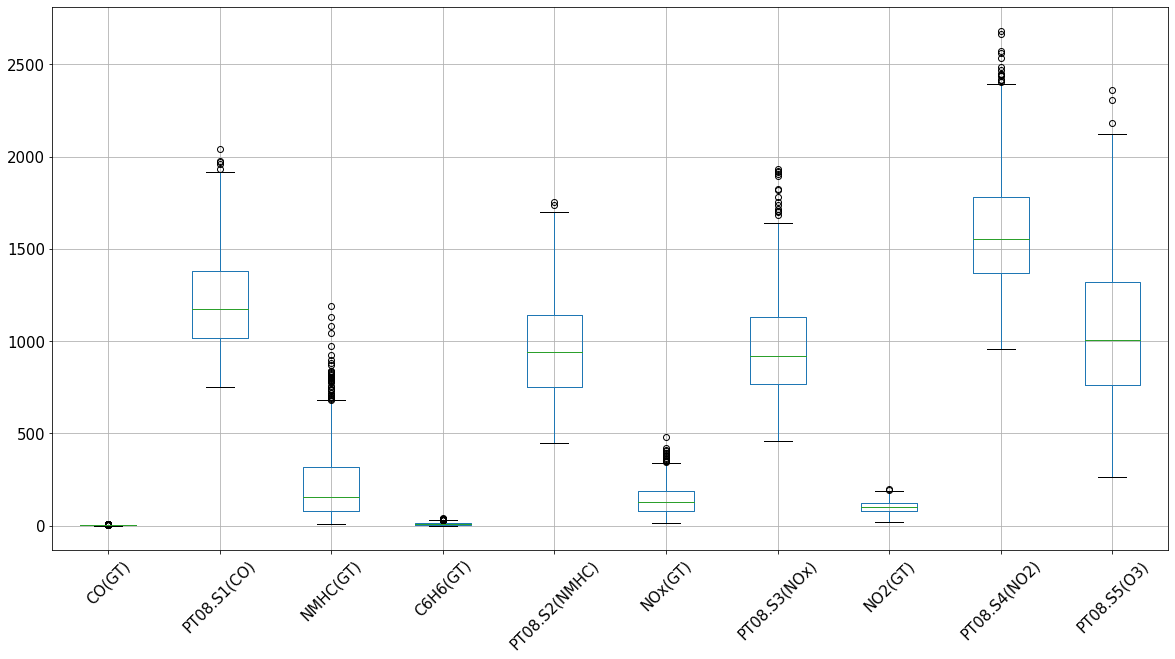

In [196]:
# to show the boxplot
df.boxplot(column = x_columns, rot=45, fontsize = 15, grid = True, figsize = (20,10))

In [197]:

# to determine the outliers
df_outliers = pd.DataFrame(df.loc[:,])

# Calculate IQR
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

CO(GT)             1.80000
PT08.S1(CO)      363.00000
NMHC(GT)         241.50000
C6H6(GT)          10.00000
PT08.S2(NMHC)    388.50000
NOx(GT)          106.00000
PT08.S3(NOx)     362.00000
NO2(GT)           43.50000
PT08.S4(NO2)     414.00000
PT08.S5(O3)      560.00000
T                  6.40000
RH                23.85000
AH                 0.20855
dtype: float64


In [198]:
# to use IQR score to filter out the outliers by keeping only valid values

# to REPLACE every outlier on the upper side by the upper whisker 
for i, j in zip(np.where(df_outliers > Q3 + 1.5 * IQR)[0], np.where(df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker_upper  = Q3 + 1.5 * IQR
    df_outliers.iloc[i,j] = whisker_upper[j]
    
# to REPLACE every outlier on the lower side by the lower whisker 
for i, j in zip(np.where(df_outliers < Q1 - 1.5 * IQR)[0], np.where(df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker_lower  = Q1 - 1.5 * IQR
    df_outliers.iloc[i,j] = whisker_lower[j] #indexing
    
#we have to use the zip function to make it compatible with the for loop
#zero in the data does not mean blank
# the code can always remain the same. This can be used as a template

In [199]:
# to remove all columns
df.drop(columns =  df.loc[:,], inplace = True)

In [200]:
# to concatenate the new columns in the dataset where outliers were replaced with whisker values
df = pd.concat([df, df_outliers], axis = 1)


<AxesSubplot:>

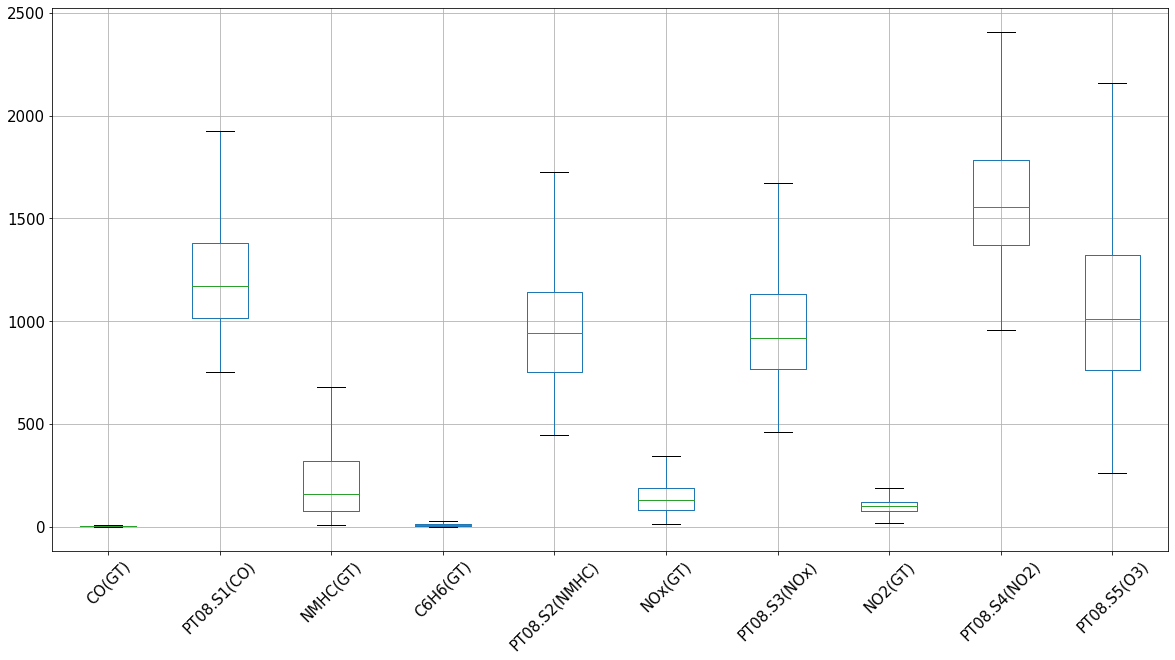

In [201]:
# to show the boxplot of the dataset where outliers were replaced with whisker values
df.boxplot(column = x_columns, rot=45,fontsize = 15, grid = True, figsize = (20,10))

### Data cleaning summary

After removing the duplicated rows and rows with missing values, there were still outliers present in the dataset. Handled these outliers by replacing every outlier with upper side of the whisker.

### 4. Exploratory data analysis 

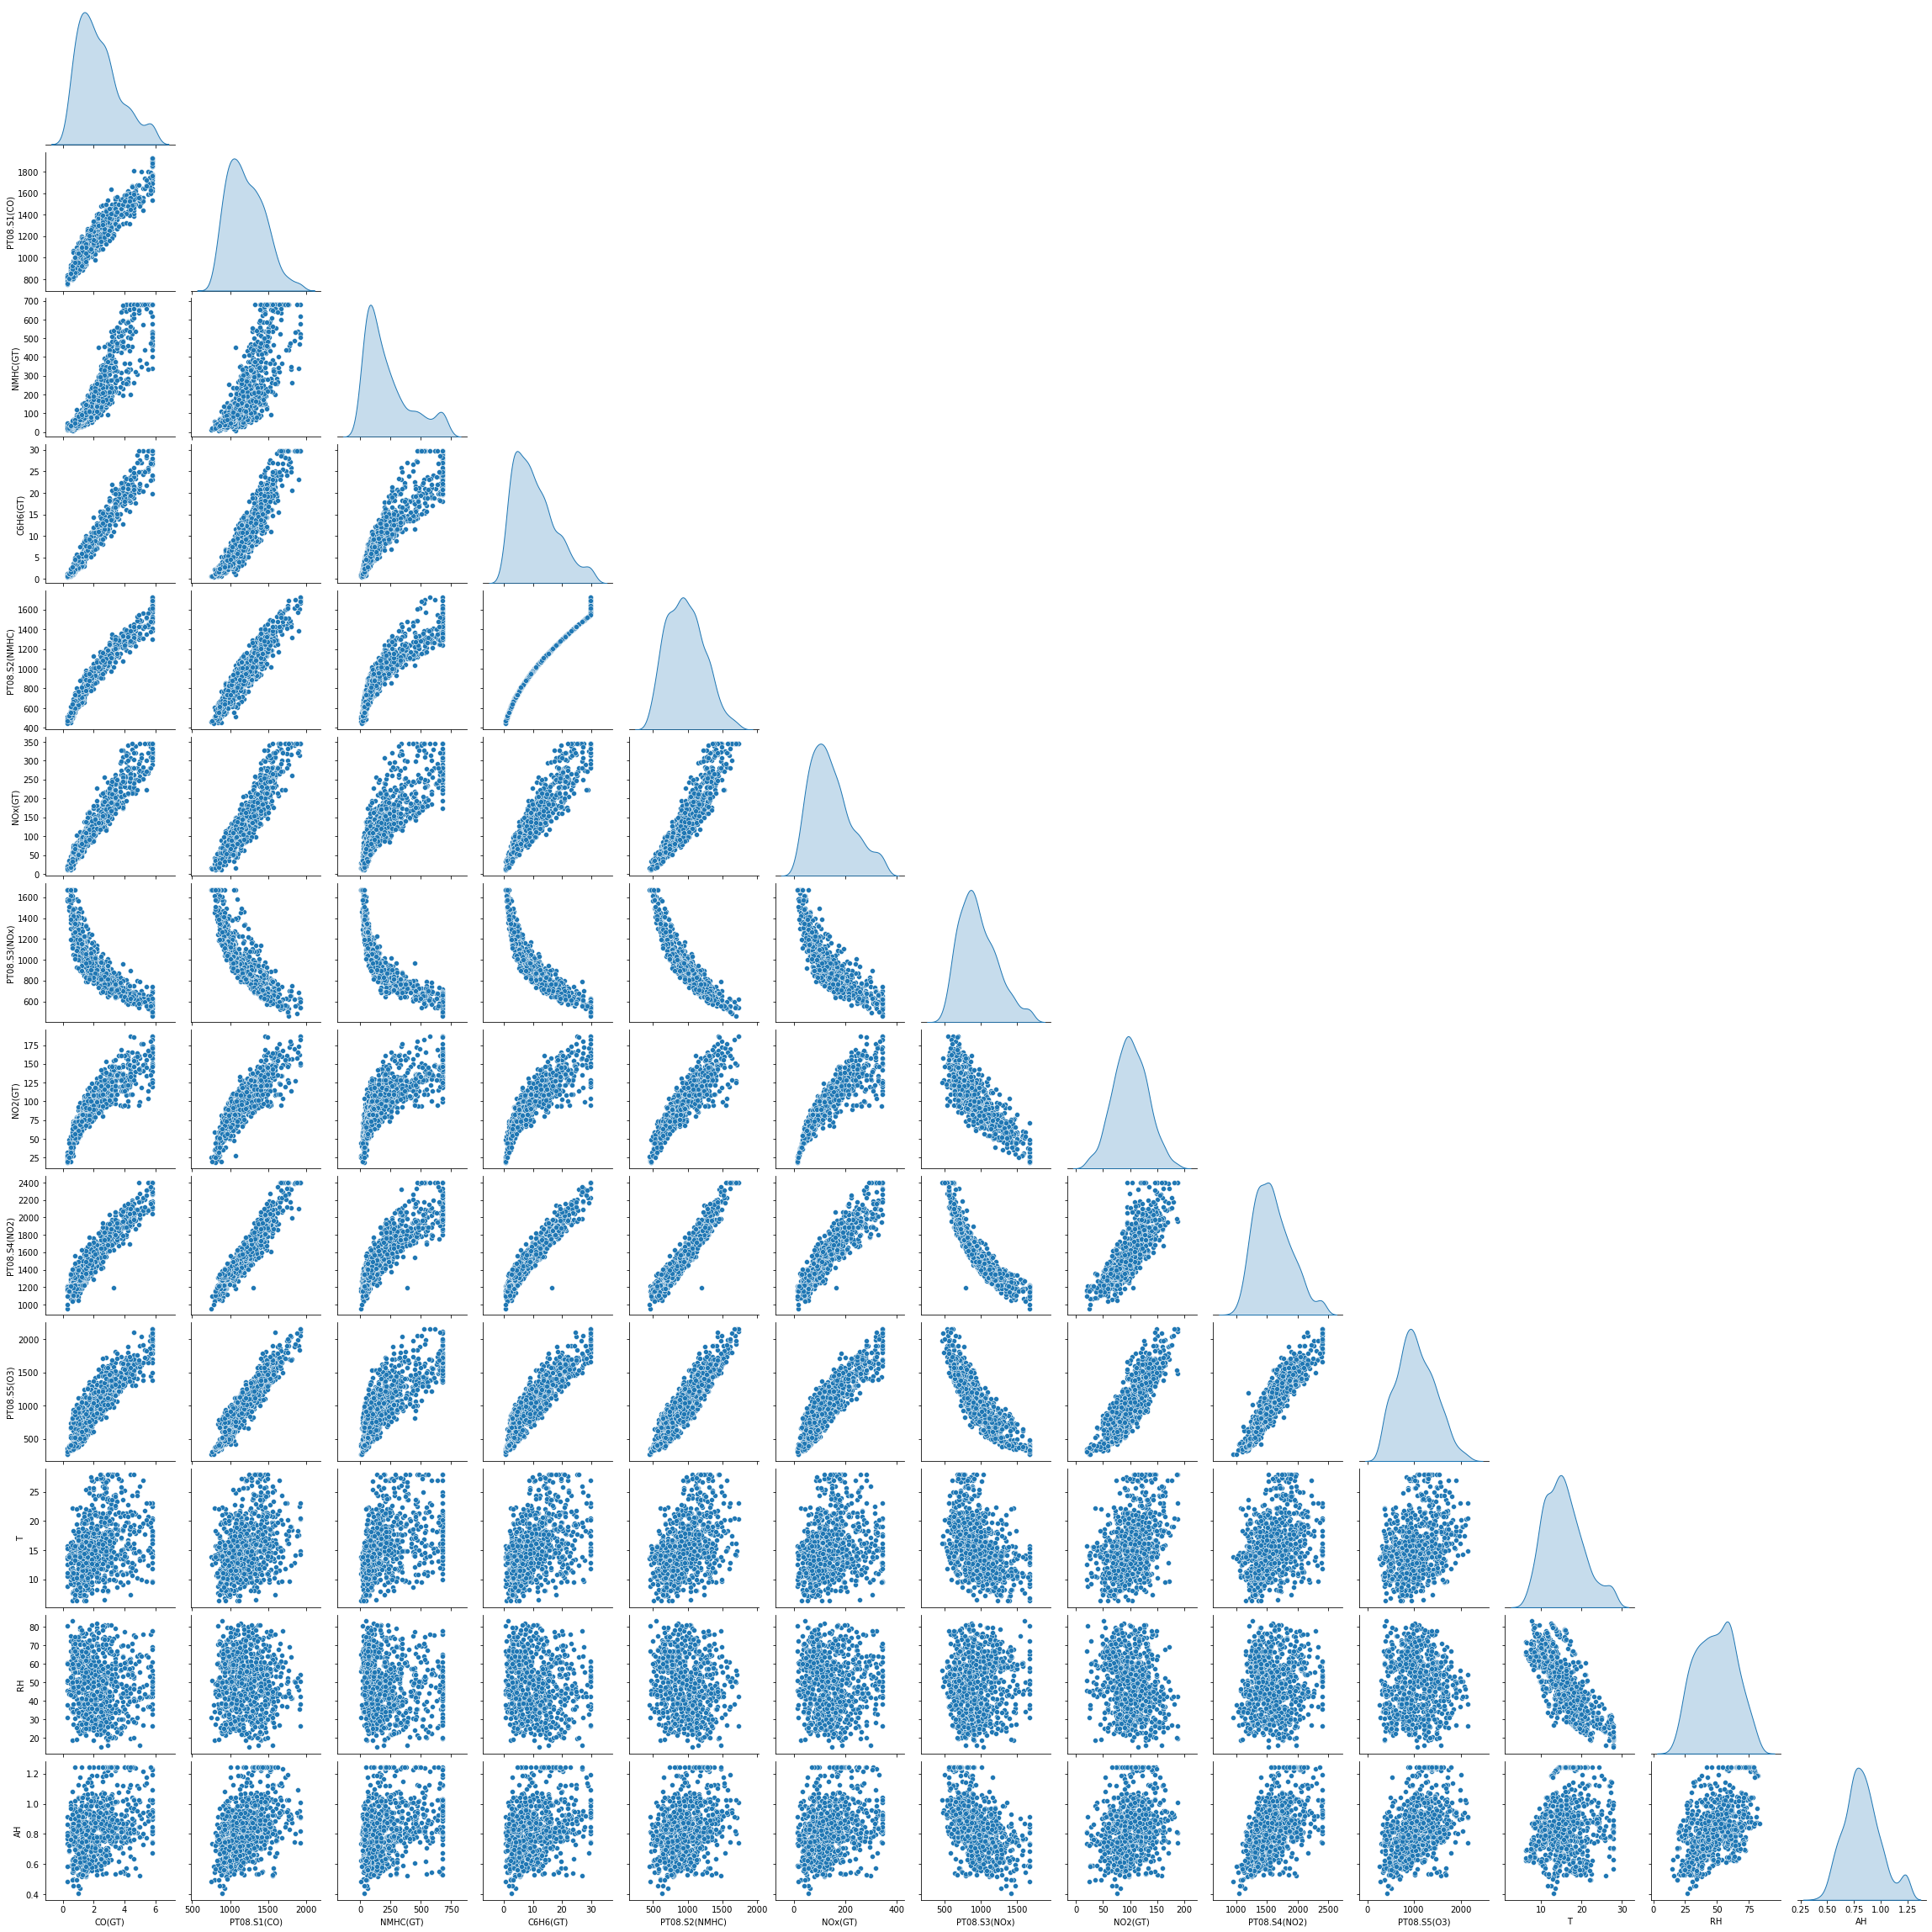

In [202]:
sns.pairplot(df, diag_kind = 'kde', corner = True);

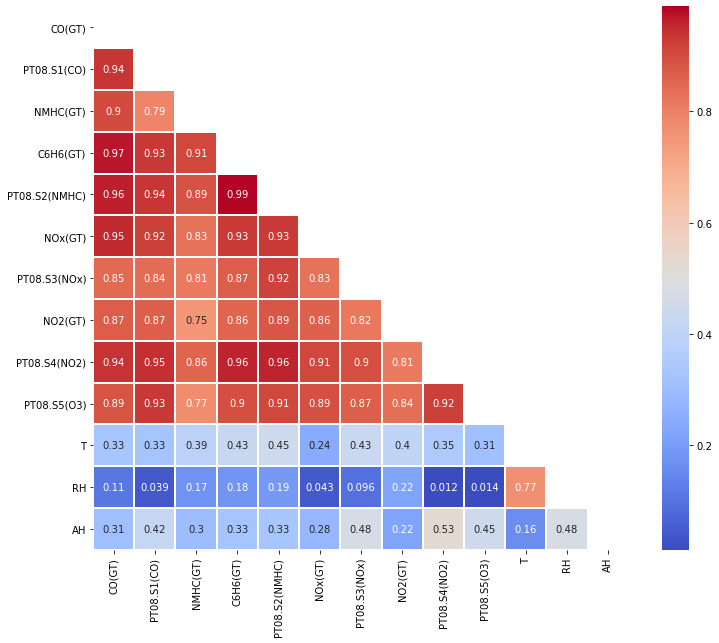

In [203]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

### 5. Creating training and testing dataset

In [231]:
# Uncomment the line below when it is the first time to run the program
X = df.iloc[:,[8]].values
Y = df.iloc[:,[12]].values


In [232]:
# to split the whole dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1) #train_size=0.8, you can either still put this or not since test_size is already defined. By default, remaining is for training

In [233]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('Y_train shape : ({0})'.format(Y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('Y_test shape : ({0})'.format(Y_test.shape[0]))

X_train shape : (661,1)
Y_train shape : (661)
X_test shape : (166,1)
Y_test shape : (166)


### 6. Machine Learning Modeling

In [234]:
# To fit the training dataset into a simple linear regression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,Y_train)

LinearRegression()

In [235]:
# To predict the output of the testing dataset
Y_predict = slr.predict(X_test)

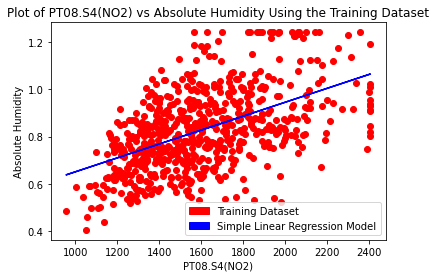

In [236]:
# To visualize the training dataset and the simple linear regression model
import matplotlib.patches as mpatches 
plt.scatter(X_train, Y_train, color = 'red') # for the plot of training dataset
Y_predict_xtrain = slr.predict(X_train) # to generate the predicted data using the training dataset
plt.plot (X_train, Y_predict_xtrain, color='blue') # for the plot of simple linear regression model
plt.title('Plot of PT08.S4(NO2) vs Absolute Humidity Using the Training Dataset')
plt.xlabel('PT08.S4(NO2)')
plt.ylabel('Absolute Humidity')

red_patch = mpatches.Patch(color='red', label='Training Dataset')
blue_patch = mpatches.Patch(color='blue', label='Simple Linear Regression Model')
plt.legend(handles=[red_patch, blue_patch])

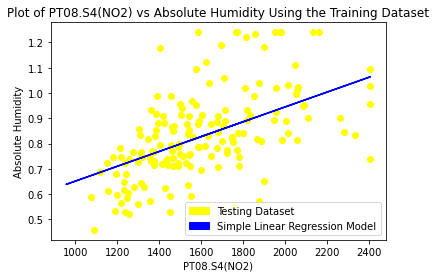

In [237]:
# To visualize the testing dataset and the simple linear regression model
plt.scatter(X_test, Y_test, color = 'yellow') # for the plot of testing dataset
plt.plot (X_train, Y_predict_xtrain, color='blue') # for the plot of simple linear regression model
plt.title('Plot of PT08.S4(NO2) vs Absolute Humidity Using the Training Dataset')
plt.xlabel('PT08.S4(NO2)')
plt.ylabel('Absolute Humidity')

yellow_patch = mpatches.Patch(color='yellow', label='Testing Dataset')
blue_patch = mpatches.Patch(color='blue', label='Simple Linear Regression Model')
plt.legend(handles=[yellow_patch, blue_patch])

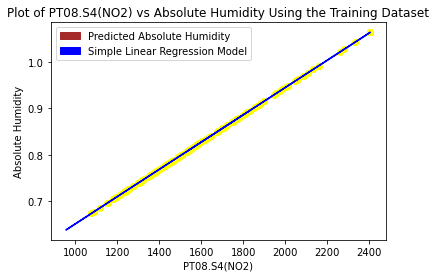

In [238]:
# To visualize the predicted salary (Y_predict) and the simple linear regression model
plt.scatter(X_test, Y_predict, color = 'yellow') # for the plot of predicted salary
plt.plot (X_train, Y_predict_xtrain, color='blue') # for the plot of simple linear regression model

plt.title('Plot of PT08.S4(NO2) vs Absolute Humidity Using the Training Dataset')
plt.xlabel('PT08.S4(NO2)')
plt.ylabel('Absolute Humidity')

brown_patch = mpatches.Patch(color='brown', label='Predicted Absolute Humidity')
blue_patch = mpatches.Patch(color='blue', label='Simple Linear Regression Model')
plt.legend(handles=[brown_patch, blue_patch])

### 7. Measuring Model Performance 

In [239]:
# To apply K-fold cross-validation for the simple linear regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [240]:
# For the Mean Absolute Error as scoring for for cross-validation 
MAE = (cross_val_score(estimator=slr, X=X, y=Y, cv=k_fold, scoring='neg_mean_absolute_error'))*-1

MAE_average = MAE.mean()
MAE_variance = MAE.std()

print('Mean Absolute Error of K-FOLDS:')
print (MAE)
print(' ')
print('Average Mean Absolute Error of K-FOLDS:')
print(MAE_average)
print(' ')
print('Mean Absolute Error Variance of K-FOLDS:')
print(MAE_variance)
print(' ')

Mean Absolute Error of K-FOLDS:
[0.1209867  0.09855423 0.11596165 0.1072741  0.11984586 0.1153113
 0.12201277 0.1215704  0.11873531 0.11530123]
 
Average Mean Absolute Error of K-FOLDS:
0.11555535602551445
 
Mean Absolute Error Variance of K-FOLDS:
0.007027132347507389
 


In [244]:
# For the Mean Squared Error as scoring for for cross-validation 
MSE = (cross_val_score(estimator=slr, X=X, y=Y, cv=k_fold, scoring='neg_mean_squared_error'))*-1

MSE_average = MSE.mean()
MSE_variance = MSE.std()

print('Mean Squared Error of K-FOLDS:')
print (MSE)
print(' ')
print('Average Mean Squared Error of K-FOLDS:')
print(MSE_average)
print(' ')
print('Mean Squared Error Variance of K-FOLDS:')
print(MSE_variance)
print(' ')

#Lower MSE, higher accuracy

Mean Squared Error of K-FOLDS:
[0.02474876 0.01728936 0.02140867 0.0176979  0.02231967 0.01989344
 0.0227509  0.02238121 0.02165081 0.01934683]
 
Average Mean Squared Error of K-FOLDS:
0.02094875637397738
 
Mean Squared Error Variance of K-FOLDS:
0.00223523089085279
 


In [242]:
# For the R Squared Error as scoring for for cross-validation 
R2 = (cross_val_score(estimator=slr, X=X, y=Y, cv=k_fold, scoring='r2'))

R2_average = R2.mean()
R2_variance = R2.std()

print('R Squared Error of K-FOLDS:')
print (R2)
print(' ')
print('Average R Squared Error of K-FOLDS:')
print(R2_average)
print(' ')
print('R Squared Error Variance of K-FOLDS:')
print(R2_variance)
print(' ')

R Squared Error of K-FOLDS:
[0.31439371 0.29544643 0.23543959 0.20261879 0.25512932 0.24616598
 0.2954313  0.3294534  0.25655583 0.08822479]
 
Average R Squared Error of K-FOLDS:
0.25188591470060073
 
R Squared Error Variance of K-FOLDS:
0.06577643766508608
 


In [243]:
# To evaluate the performance of the multiple linear regression model using holdout
# A. For the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
MAE_hold = mean_absolute_error(Y_test, Y_predict)
print('Mean Absolute Error: %.4f'
      % MAE_hold)
print(' ')

# B. For the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE_hold = mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error: %.4f'
      % MSE_hold)
print(' ')  

# C. For the Root Mean Squared Error (RMSE)/Deviation
from math import sqrt
RMSE_hold = sqrt(MSE_hold)
print('Root Mean Squared Error: %.4f'
      % RMSE_hold)
print(' ') 

# D. For the Explained Variance Score (EVS) -> ideal is 1
from sklearn.metrics import explained_variance_score
EVS_hold = explained_variance_score(Y_test, Y_predict)
print('Explained Variance Score: %.4f'
      % EVS_hold)
print(' ') 

# E. For the Coefficient of Determination Regression Score Function, R Squared Error (R2) -> ideal is 1
from sklearn.metrics import r2_score
R2_hold = r2_score(Y_test, Y_predict)
print('R2 Error: %.4f'
      % R2_hold)
print(' ')  

Mean Absolute Error: 0.1096
 
Mean Squared Error: 0.0210
 
Root Mean Squared Error: 0.1450
 
Explained Variance Score: 0.3089
 
R2 Error: 0.3078
 
